In [1]:
import sys
import os
import numpy as np
import time
import matplotlib.pyplot as plt
import astropy.constants as cons
import astropy.units as unit
os.chdir("../")
path = os.getcwd()
sys.path.insert(0, path)
import GWGen
from GWGen import *
from GWGen.WFGenerator import *

In [44]:
mu = 1.16e-17
M = 1e6
m=1
spin = 0.9
MK = EMRIWithProcaWaveform()
traj = PNTraj()
EW = EMRIWaveform()
alphavalue(M,mu)

<Quantity 0.0868044>

In [45]:
ProcaSolution.__init__(MK,M,spin,mu)
EF = MK.BosonCloudGWEFlux()*MK.BosonCloudMass()/m
LF = MK.BosonCloudGWLFlux()*MK.BosonCloudMass()/m
EF

<Quantity 6.93968131e-07>

In [46]:
mwv = MK(M,m,mu,spin,14,0.1,1,T=2,npoints=50, qS=1e-12, phiS=0., qK=0., phiK=0., DeltaEFlux=EF, DeltaLFlux=LF)

In [21]:
wv = EW(M,m,spin,14,0.1,1,1e-12,0.,0.,0., 1, dt=15, T=2)

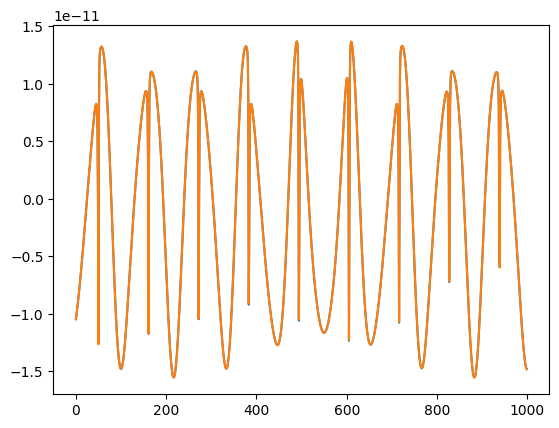

In [39]:
sx = len(mwv)-1000
ex = len(mwv)
plt.plot(wv.real[sx:ex])
plt.plot(mwv.real[sx:ex])
plt.show()

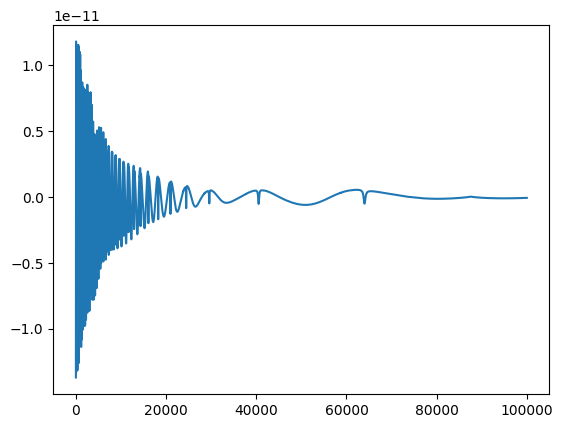

In [52]:
plt.plot(mwv.real[:100000])

In [42]:
mwv.real[ex-1]

-1.4831904892289846e-11